# Lab 03

- Name: Ran Arino
- Student ID: 153073200
- Email: rarino@myseneca.ca
- Course: Machine Learning
- Course ID: BDA500NAA.05380.2237
- Professor: Dr. Amir Moslemi

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import operator

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


## Data Preparations

In [3]:
# Code 1: Data structure

# load data
df = pd.read_csv('trucks.csv')

# shape
print("Check data frame information:")
print(df.info())
print()
# observe data
print('Show the first 5 rows')
df.head()

Check data frame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   list_price  23 non-null     float64
 1   best_price  23 non-null     float64
dtypes: float64(2)
memory usage: 500.0 bytes
None

Show the first 5 rows


,list_price,best_price
0,12.4,11.2
1,14.3,12.5
2,14.5,12.7
3,14.9,13.1
4,16.1,14.1


In [4]:
# Code 2: Statistics

# check bacis statistics
df.describe()


,list_price,best_price
count,23.000000,23.000000
mean,17.465217,15.300000
std,2.413901,2.057580
min,12.400000,11.200000
25%,15.800000,14.050000
50%,17.299999,15.100000
75%,19.300000,16.849999
max,22.400000,19.600000


## Visualize Data

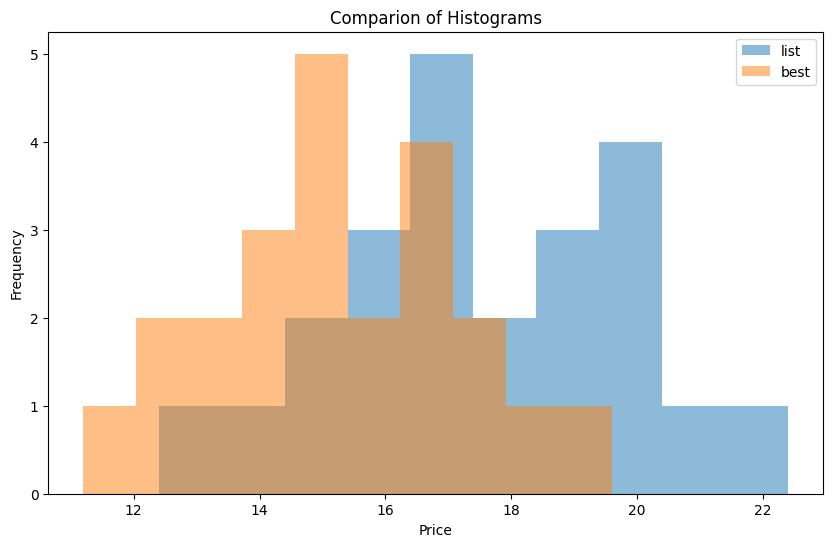

In [5]:
# Code 3: Data distributions

# historgrams
plt.figure(figsize=(10, 6))

plt.hist(df['list_price'], bins=10, alpha=0.5, label='list')
plt.hist(df['best_price'], bins=10, alpha=0.5, label='best')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Comparion of Histograms')
plt.legend()
plt.show()


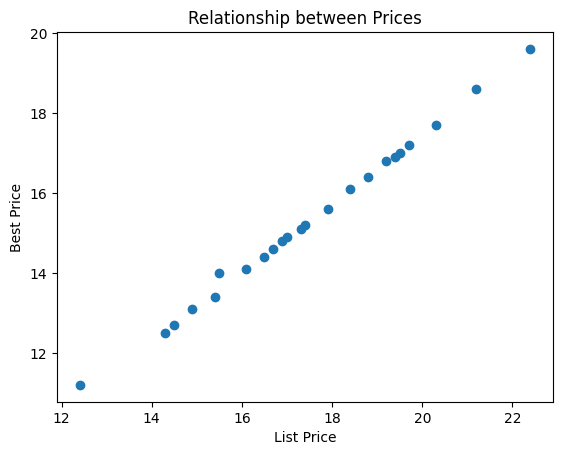

In [6]:
# Code 4: Relationship between data
plt.scatter(x=df['list_price'], y=df['best_price'])
plt.xlabel('List Price')
plt.ylabel('Best Price')
plt.title('Relationship between Prices')
plt.show()

In [7]:
# Code 5: Correlation

# get the correlation matrix
df.corr()

,list_price,best_price
list_price,1.00000,0.99854
best_price,0.99854,1.00000


## Model Implementations

In [8]:
# Code 6: Data split

# using external library
X_train, X_test, Y_train, Y_test = train_test_split(df[['list_price']], df['best_price'], test_size=0.3, random_state=42)

# check number of data
print("Train set: ")
print("X: ", len(X_train), "Y: ", len(Y_train))
print("Test set: ")
print("X: ", len(X_test), "Y: ", len(Y_test))

Train set: 
X:  16 Y:  16
Test set: 
X:  7 Y:  7


In [9]:
# Code 7: Model creation / evaluation

# define model
model = LinearRegression()
# fit the training data
model.fit(X_train, Y_train)
# predicted variable based on test data
Y_hat = model.predict(X_test)
# Evaluate the model by RMSE(root of mean squared error)
rmse = (sum([diff**2 for diff in Y_test - Y_hat]) / len(Y_hat)) ** 0.5
print("RMSE: ", rmse)


RMSE:  0.1050078755704149


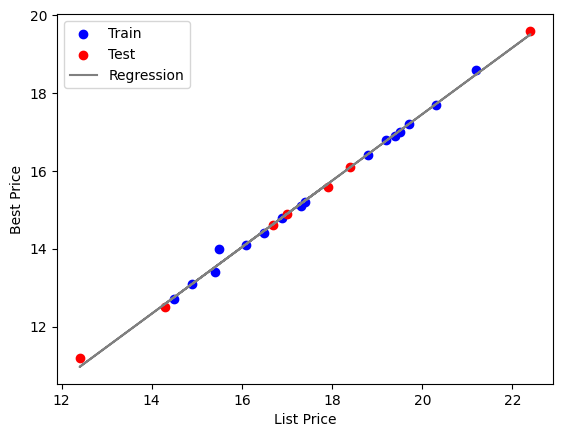

In [10]:
# Code 8: Plotting regression line

plt.scatter(X_train, Y_train, color='blue', label='Train')
plt.scatter(X_test, Y_test, color='red', label='Test')
plt.plot(X_test, Y_hat, color='grey', label='Regression')
plt.xlabel('List Price')
plt.ylabel('Best Price')
plt.legend()
plt.show()

{1: array([0.        , 0.85489703]), 2: array([0.        , 0.59710989, 0.0072746 ]), 3: array([ 0.00000000e+00,  4.37718992e+00, -2.06548683e-01,  4.00166600e-03]), 4: array([ 0.00000000e+00,  5.47378286e+01, -4.47825942e+00,  1.64070935e-01,
       -2.23599115e-03])}


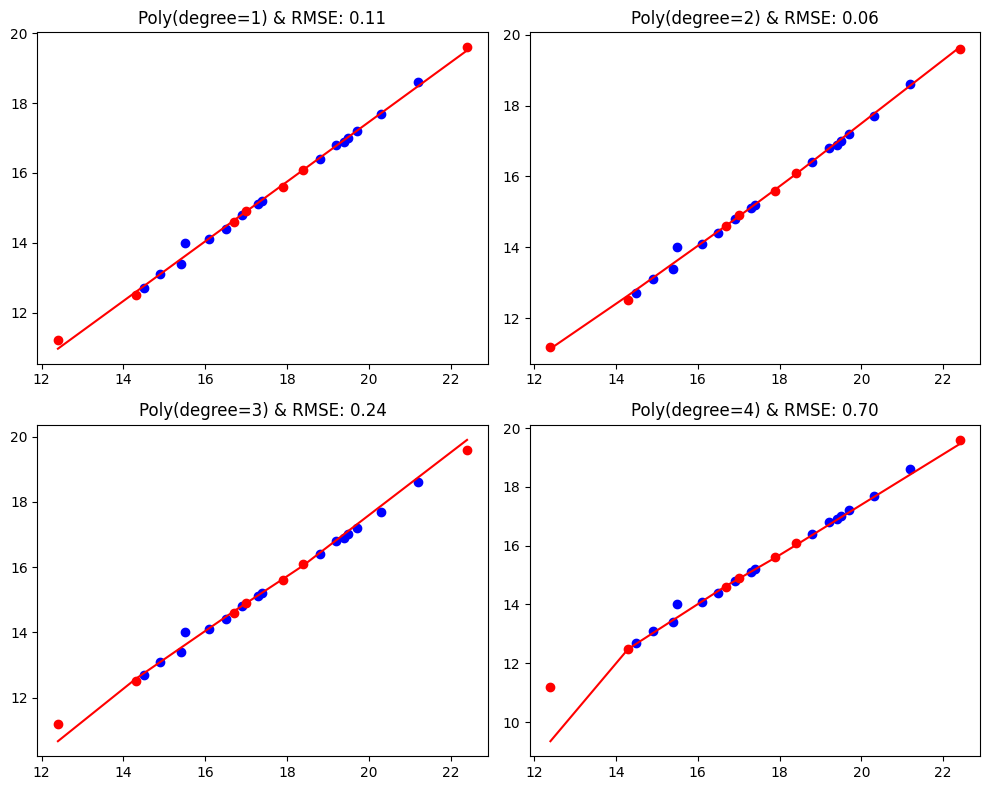

In [31]:
# Code 9: Comparing Different Polynomial Models

def multi_poly_degrees(data: list, degrees: int):
    """
    Plotting the multiple graphs (actual data point and predicted line) based on various polynomial degrees.
    Showing the evaluation measure (RMSE: Root of Mean Squared Error) on each graph.

    Parameters:
    - data: a list of data, which is composed of X_train, X_test, Y_train, Y_test
    - degrees: the maximum polynomial degrees that you wanna focus on.
    """

    X_train, X_test, Y_train, Y_test = data

    fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # Adjust the size as needed

    # store coefficients
    coefs = {}

    # traversing all degrees
    for d in range(degrees):
        # define object
        poly_regs = PolynomialFeatures(degree=d+1)
        # fit and transform
        X_poly = poly_regs.fit_transform(X_train)
        # define linear regression
        model = LinearRegression()
        # fitting data
        model.fit(X_poly, Y_train)
        # get predicted value
        X_test_transformed = poly_regs.fit_transform(X_test)
        Yhat = model.predict(X_test_transformed)
        # add coefficisnts
        coefs[d+1] = model.coef_

        # calculate residuals
        res = [a - p for a, p in zip(Y_test, Yhat)]
        # calculate rmse
        rmse = (sum([r**2 for r in res]) / len(Yhat)) ** 0.5

        # visualization
        ax = axs[d // 2, d % 2]
        ax.scatter(X_train, Y_train, color='blue', label='Train')
        ax.scatter(X_test, Y_test, color='red', label='Test')
        ax.plot(sorted(X_test.values), sorted(Yhat), color='red')
        ax.set_title(f"Poly(degree={d+1}) & RMSE: {rmse:.2f}")

    print(coefs)
    plt.tight_layout()
    plt.show()
    

multi_poly_degrees([X_train, X_test, Y_train, Y_test], degrees=4)
